In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [4]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [5]:
28 * 28 

784

In [3]:
X_train = df_train.iloc[:, 1:].values / 255
y_train = df_train.iloc[:, 0].values 
X_test = df_test.iloc[:, 1:].values /255
y_test = df_test.iloc[:, 0].values


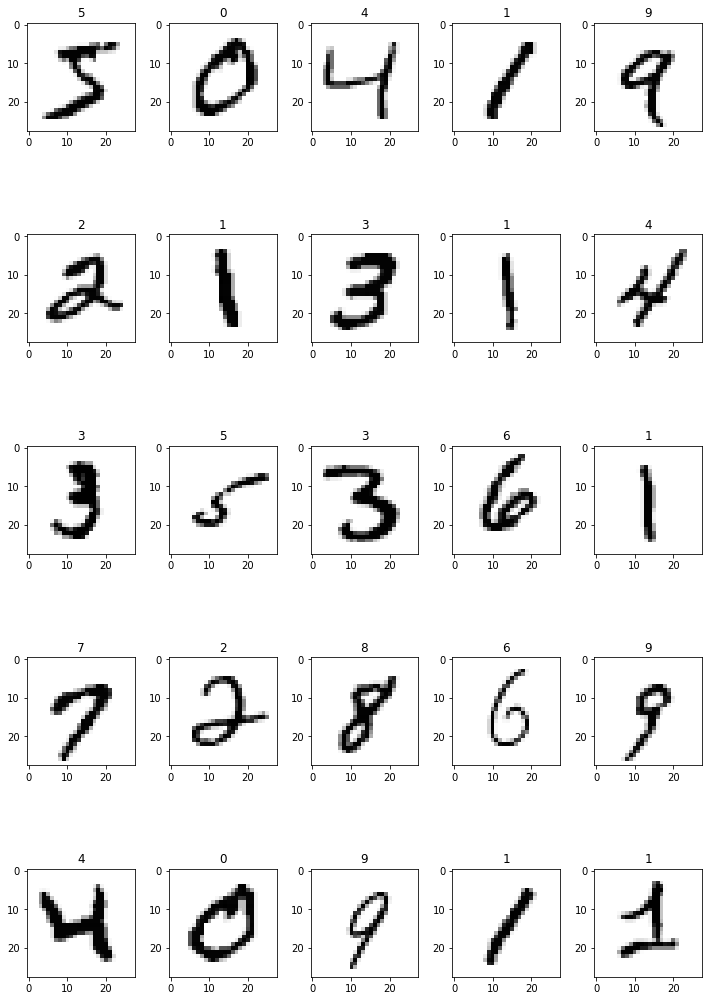

In [4]:
fig, _ = plt.subplots(5, 5, figsize = (10, 15))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap="Greys")
    ax.set_title(y_train[i])
    
plt.tight_layout()

In [5]:
np.mean(X_train, axis = 1)

array([0.13768007, 0.15553721, 0.0972539 , ..., 0.11070428, 0.10218087,
       0.10464186])

In [6]:
res = pd.DataFrame({"mean": np.mean(X_train, axis = 1), "label": y_train})
res.head()

,label,mean
0,5,0.137680
1,0,0.155537
2,4,0.097254
3,1,0.085709
4,9,0.116116


In [26]:
res.groupby("label").agg([np.mean, np.std])

mean          
           mean       std
label                    
0      0.173399  0.042106
1      0.075999  0.021993
2      0.148975  0.038054
3      0.141530  0.037791
4      0.121366  0.031889
5      0.128749  0.037267
6      0.137302  0.037432
7      0.114528  0.030635
8      0.150156  0.038636
9      0.122590  0.032447

In [31]:
a = X_train[0].reshape(-1, 1)
a

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.   

In [8]:
from sklearn import cluster, linear_model

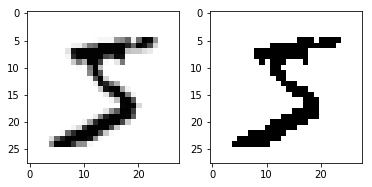

In [34]:
fig, axes = plt.subplots(1, 2)
kmeans = cluster.KMeans(n_clusters=2)
y_k = kmeans.fit_predict(a)
axes[0].imshow(a.reshape(28, 28), cmap="Greys")
axes[1].imshow(y_k.reshape(28, 28), cmap="Greys")

In [ ]:
%%time 
# Takes ~ 11 mins to run
est = linear_model.LogisticRegression(multi_class = "multinomial", solver="saga")
est.fit(X_train, y_train)
est.score(X_test, y_test)

In [11]:
%%time 
est = linear_model.SGDClassifier(n_jobs=4, tol=1e-5, eta0 = 0.15,  
                                 learning_rate = "invscaling", 
                                 alpha = 0.01, max_iter= 100)
est.fit(X_train, y_train)
print("accuracy", est.score(X_test, y_test), "iterations:", est.n_iter_)

accuracy 0.9089 iterations: 21
CPU times: user 12.9 s, sys: 207 ms, total: 13.1 s
Wall time: 4.62 s


In [12]:
res = pd.DataFrame({"actual": y_test, "prediction": est.predict(X_test)})

In [13]:
res["match"] = res.actual == res.prediction
res.head()

,actual,prediction,match
0,7,7,True
1,2,2,True
2,1,1,True
3,0,0,True
4,4,4,True


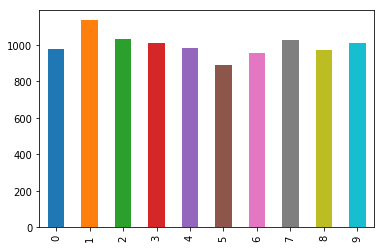

In [16]:
res.actual.value_counts().sort_index().plot.bar()

In [41]:
agg = res.groupby(["actual", "match"]).count().unstack().reset_index().values.astype(np.float32)

In [46]:
pd.DataFrame({"label": range(10), 
              "error rate": agg[:, 1] / np.sum(agg, axis = 1) }).sort_values("error rate", ascending = False)

,error rate,label
5,0.000220,5
8,0.000176,8
9,0.000146,9
2,0.000128,2
3,0.000111,3
4,0.000096,4
7,0.000090,7
6,0.000050,6
1,0.000025,1
0,0.000016,0
